In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
#!pip install plotly


In [11]:
#!pip install cufflinks

In [ ]:
#!pip install wordcloud

     ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
     ---------- ---------------------------- 81.9/300.4 kB 2.3 MB/s eta 0:00:01
     -------------------------------------  297.0/300.4 kB 3.7 MB/s eta 0:00:01
     -------------------------------------- 300.4/300.4 kB 3.1 MB/s eta 0:00:00


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
import nltk
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...


True

In [16]:
data = pd.read_csv("./Dataset/cyberbullying_tweets.csv")
data.head(10)

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
5,"@Raja5aab @Quickieleaks Yes, the test of god i...",not_cyberbullying
6,Itu sekolah ya bukan tempat bully! Ga jauh kay...,not_cyberbullying
7,Karma. I hope it bites Kat on the butt. She is...,not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
9,Rebecca Black Drops Out of School Due to Bully...,not_cyberbullying


In [19]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

from wordcloud import STOPWORDS
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm', 'im', 'll', 'y', 've', 'u', 'ur', 'don', 't', 's'])

def lower(text):
    return text.lower()

def remove_twitter(text):
    return re.sub(TEXT_CLEANING_RE, ' ', text)

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def clean_text(text):
    text = lower(text)
    text = remove_twitter(text)
    text = remove_stopwords(text)
    return text

In [ ]:
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = STOPWORDS).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [22]:
data['tweet_text']=data['tweet_text'].apply(clean_text)

In [28]:
from nltk.stem import WordNetLemmatizer

lematizer=WordNetLemmatizer()

def lemmatizer_words(text):
    return " ".join([lematizer.lemmatize(word) for word in text.split()])

data['tweet_text']=data['tweet_text'].apply(lambda text: lemmatizer_words(text))

In [29]:
data.cyberbullying_type.unique()

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

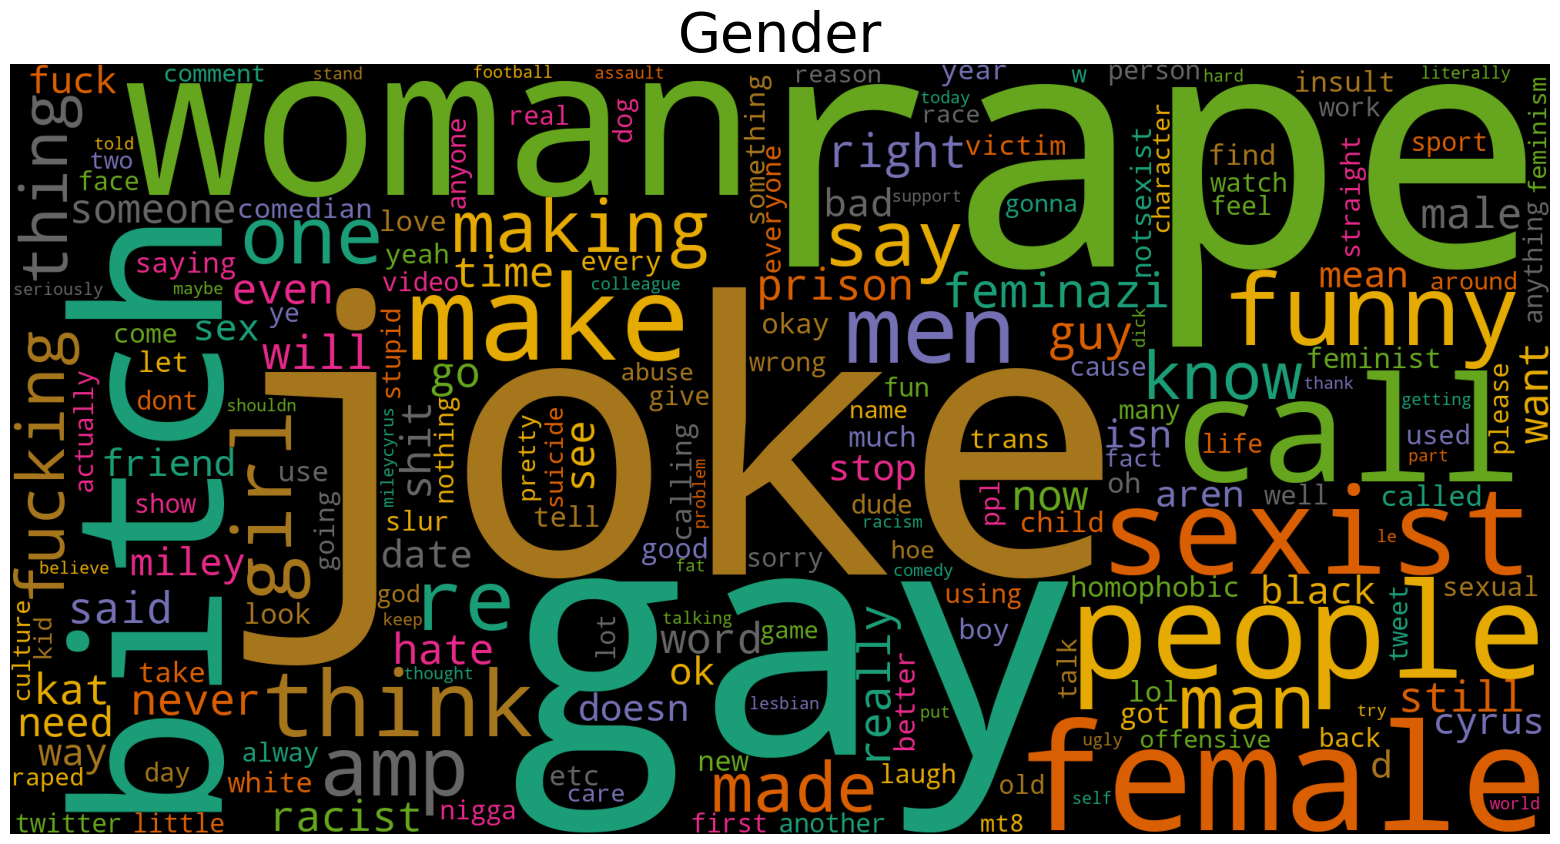

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize=(20,10))
subset1 = data[data['cyberbullying_type']=='gender']
text_gender = subset1.tweet_text.values
cloud1=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_gender))

plt.axis('off')
plt.title("Gender",fontsize=40)
plt.imshow(cloud1)

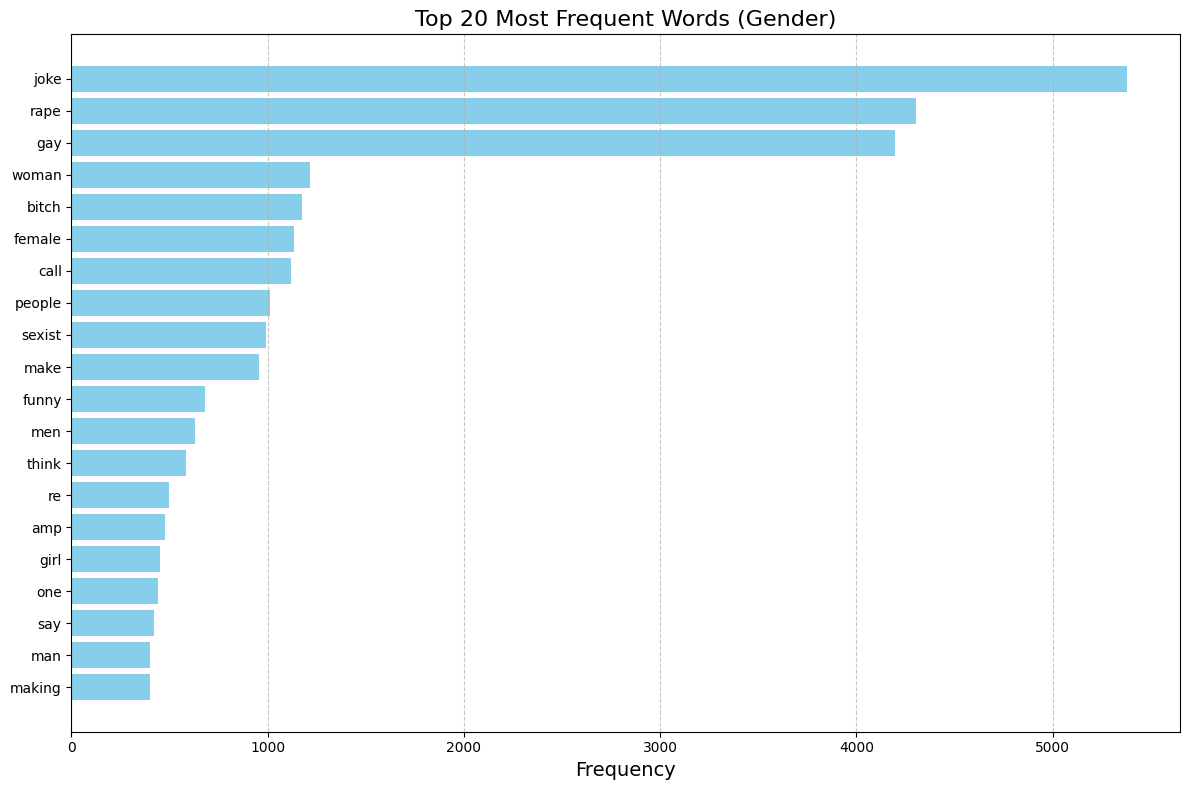

In [50]:
# Buat plot kata yang paling sering muncul
most_common_words = word_freq.most_common(20)  # ambil 20 kata paling sering
words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot frekuensi kata
plt.figure(figsize=(12, 8))
plt.barh(words_df['Word'][::-1], words_df['Frequency'][::-1], color='skyblue')
plt.xlabel("Frequency", fontsize=14)
plt.title("Top 20 Most Frequent Words (Gender)", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


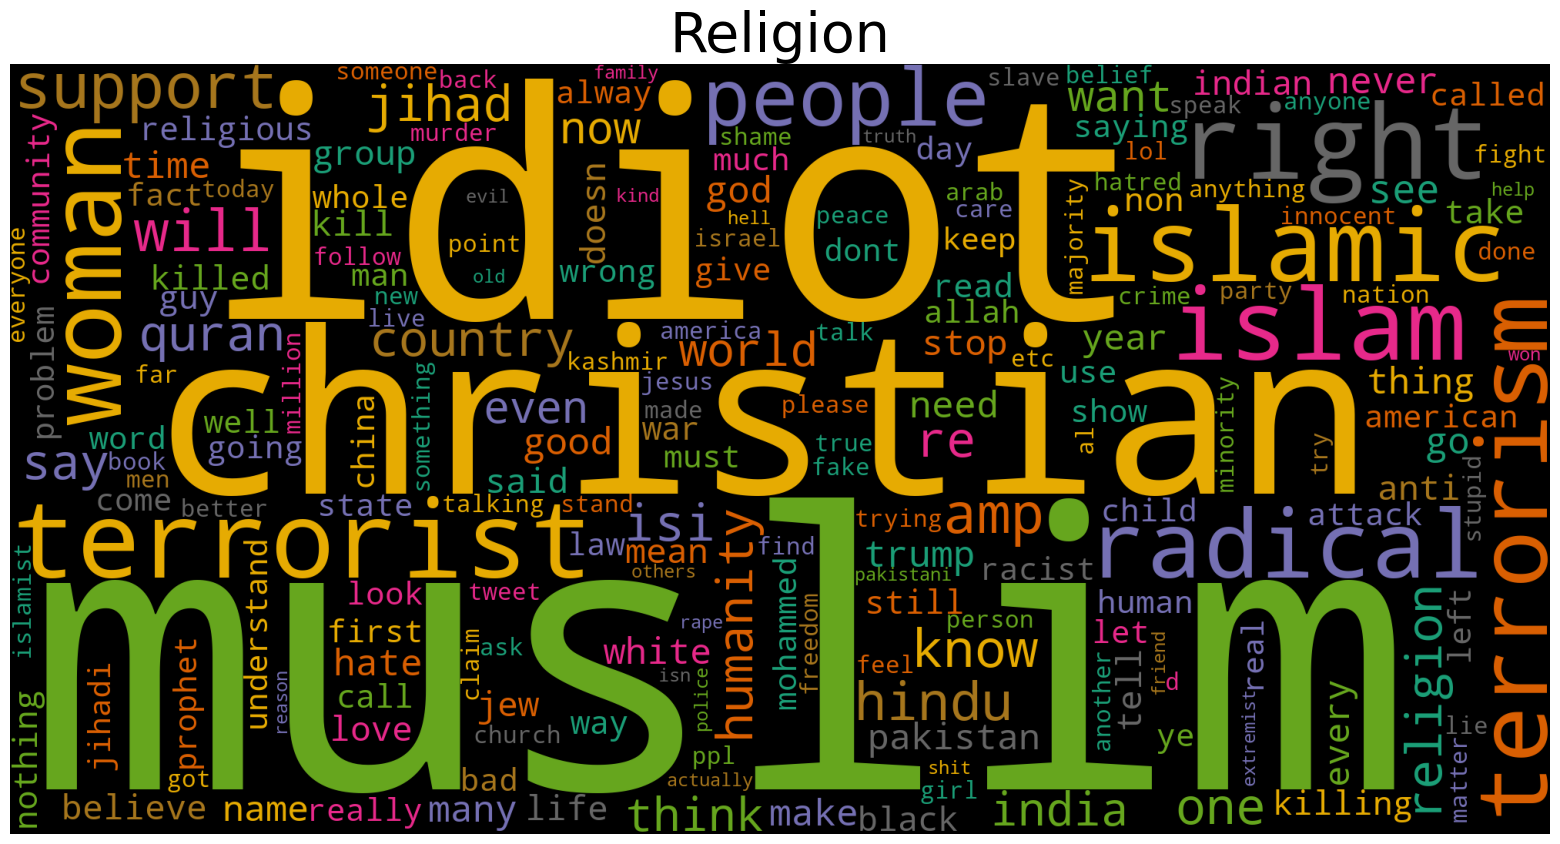

In [37]:
plt.figure(figsize=(20,10))
subset2 = data[data['cyberbullying_type']=='religion']
text_religion = subset2.tweet_text.values
cloud2=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_religion))

plt.axis('off')
plt.title("Religion",fontsize=40)
plt.imshow(cloud2)

In [48]:
# Buat plot kata yang paling sering muncul
most_common_words_religion = word_freq_religion.most_common()
words_df_religion = pd.DataFrame(most_common_words_religion, columns=['Word', 'Frequency'])

# Plot frekuensi kata
plt.figure(figsize=(12, 8))
plt.barh(words_df_religion['Word'][::-1], words_df_religion['Frequency'][::-1], color='salmon')
plt.xlabel("Frequency", fontsize=14)
plt.title("Top 20 Most Frequent Words (Religion)", fontsize=16)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


NameError: name 'word_freq_religion' is not defined

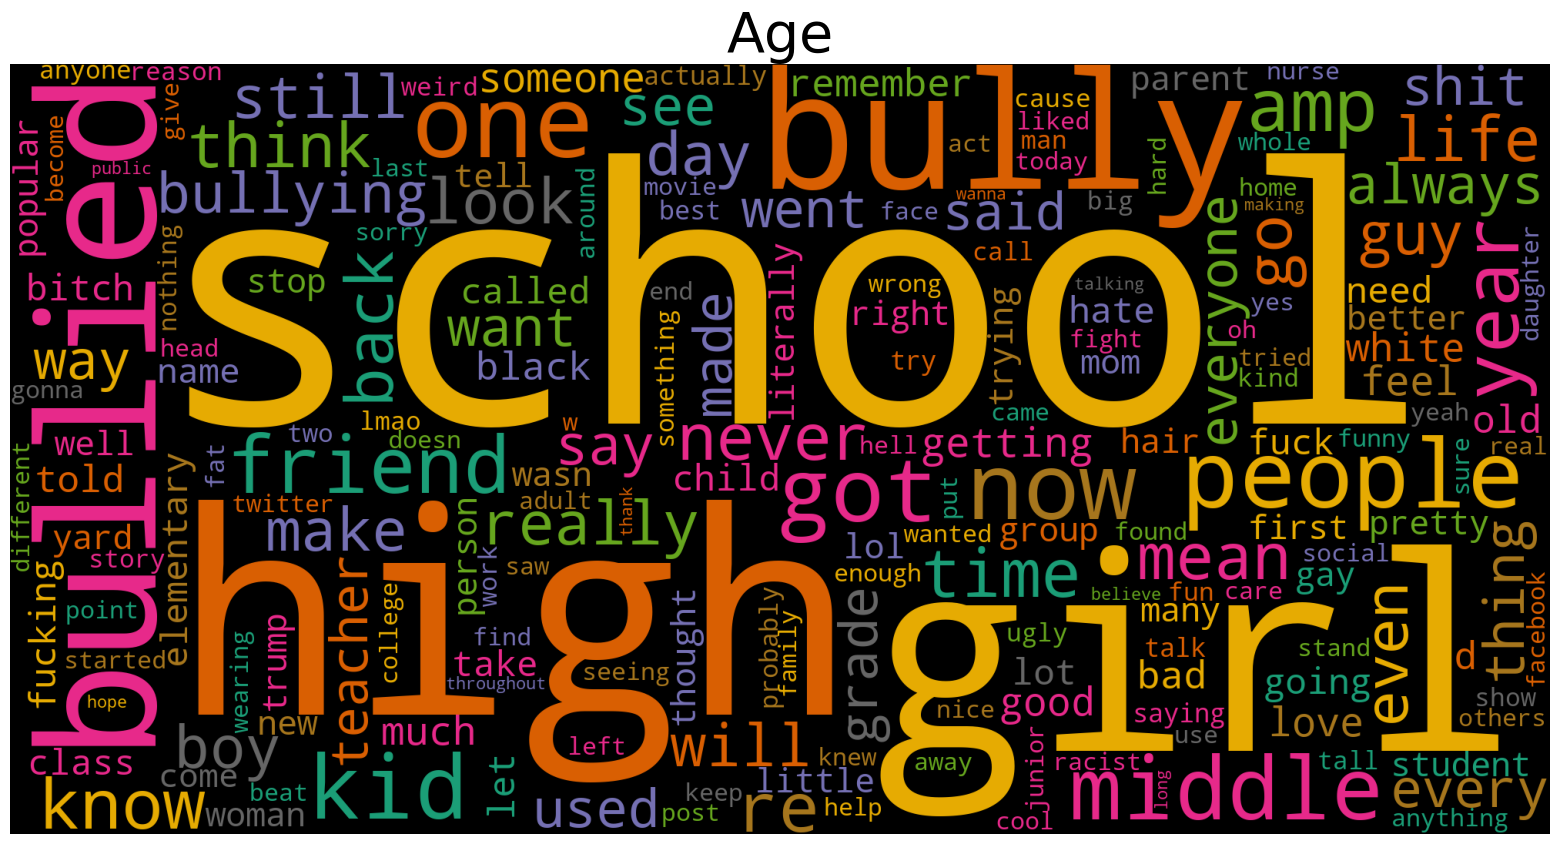

In [39]:
plt.figure(figsize=(20,10))
subset3 = data[data['cyberbullying_type']=='age']
text_age = subset3.tweet_text.values
cloud3=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_age))

plt.axis('off')
plt.title("Age",fontsize=40)
plt.imshow(cloud3)

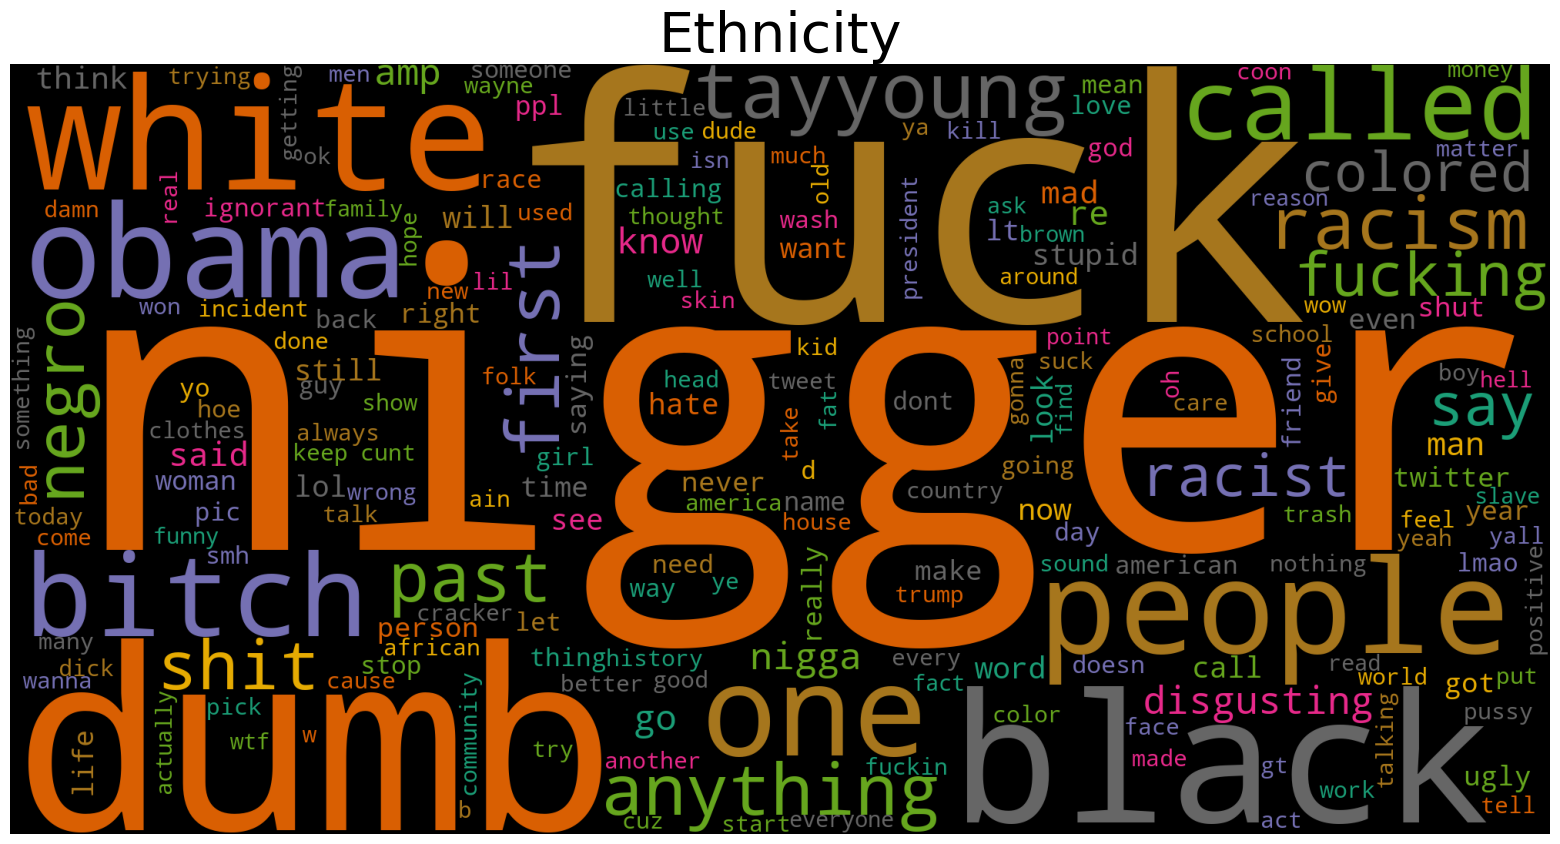

In [ ]:
plt.figure(figsize=(20,10))
subset4 = data[data['cyberbullying_type']=='ethnicity']
text_ethnicity = subset4.tweet_text.values
cloud4=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_ethnicity))

plt.axis('off')
plt.title("Ethnicity",fontsize=40)
plt.imshow(cloud4)

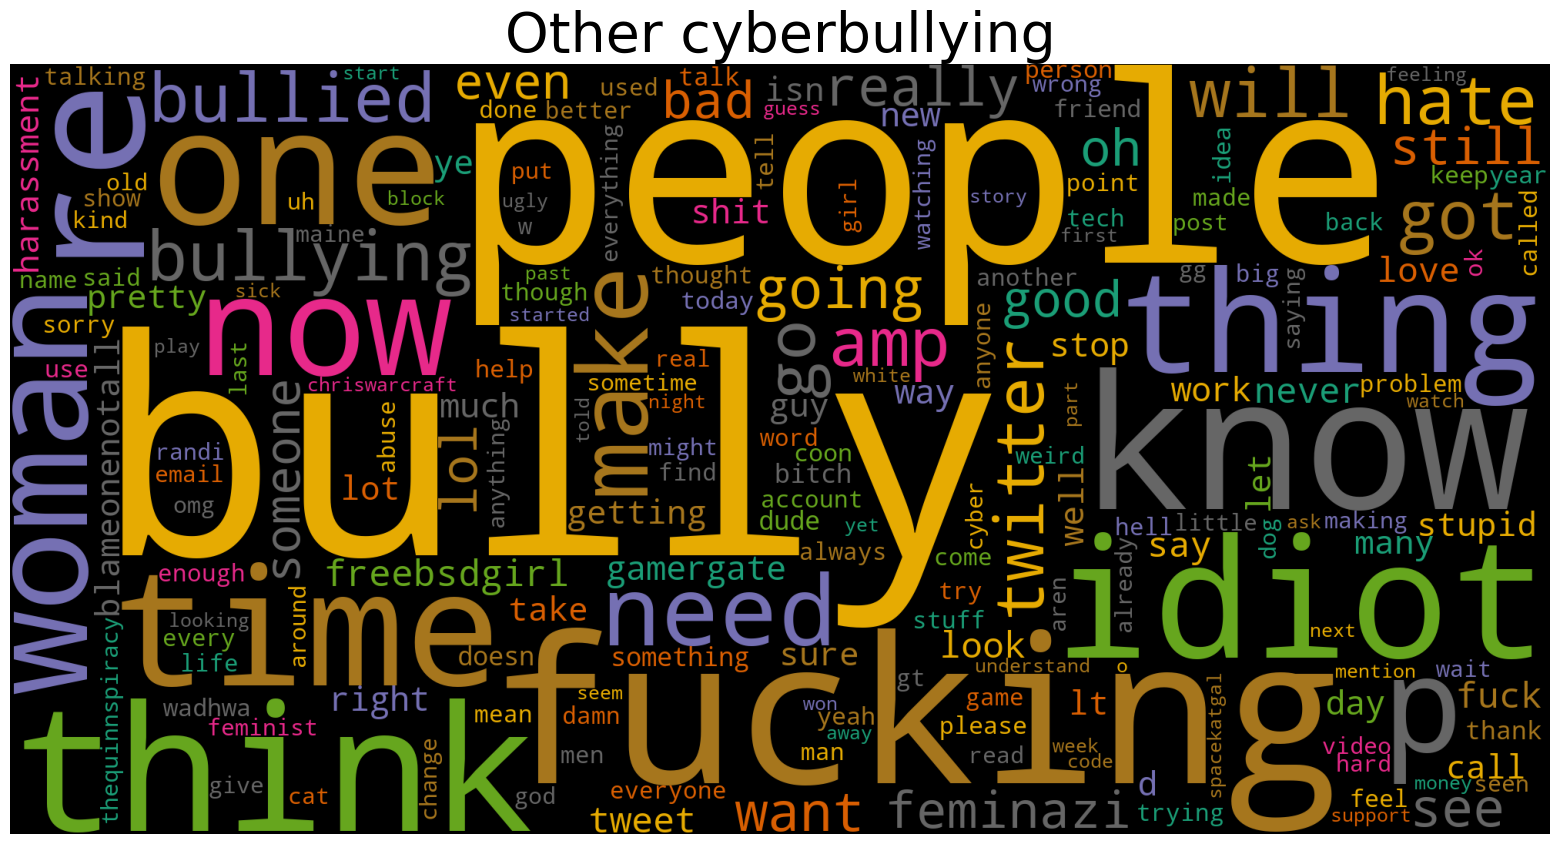

In [42]:
plt.figure(figsize=(20,10))
subset5 = data[data['cyberbullying_type']=='other_cyberbullying']
text_other = subset5.tweet_text.values
cloud5=WordCloud(background_color='black',colormap="Dark2",collocations=False,width=2000,height=1000).generate(" ".join(text_other))

plt.axis('off')
plt.title("Other cyberbullying",fontsize=40)
plt.imshow(cloud5)